In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from optimask import OptiMask
from shapely import box

In [2]:
def plot(data, figsize=None, title=None, show=True):
    cmap = plt.get_cmap("Spectral_r")
    cmap.set_bad('grey')
    plt.figure(figsize=figsize)
    plt.pcolormesh(data, cmap=cmap)
    plt.gca().axis('off')
    plt.gca().set_aspect('equal')
    plt.title(title)
    if show:
        plt.show()


def generate_random(m, n, ratio):
    arr = np.zeros((m, n))
    nan_count = int(ratio * m * n)
    indices = np.random.choice(m * n, nan_count, replace=False)
    arr.flat[indices] = np.nan
    return arr

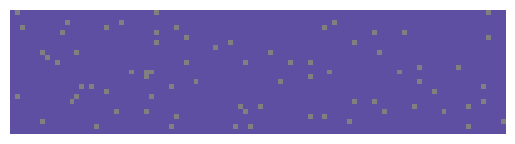

In [3]:
m, n = 25, 100
ratio = 0.03
x = generate_random(m, n, ratio)
plot(x)

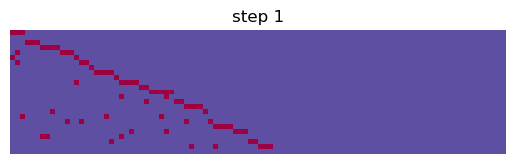

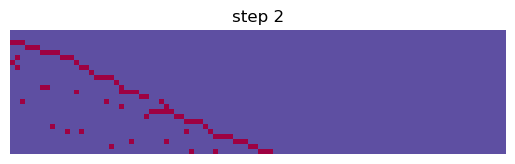

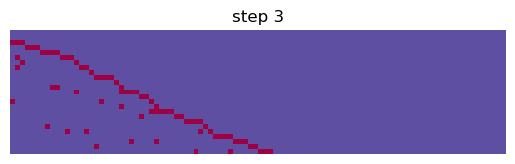

In [4]:
xp = np.isnan(x)

step = 0
while not OptiMask._is_pareto_ordered(xp):
    axis = (step % 2)
    xp, _ = OptiMask._process_step(xp, axis=axis)
    plot(xp, title=f'step {step+1}')
    step += 1

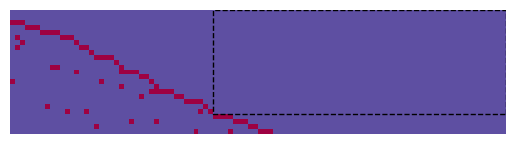

In [5]:
i0, j0 = OptiMask._get_largest_rectangle(xp)

r = gpd.GeoSeries([box(i0, j0, n, m)])

plot(xp, show=False)
r.plot(ax=plt.gca(), fc='none', linestyle='dashed')
plt.show()

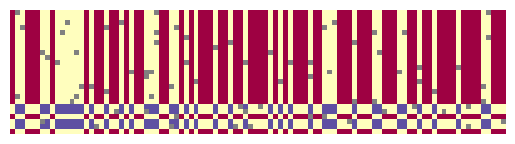

In [6]:
rows, cols = OptiMask.solve(x)

x_sub = x.copy()
x_sub[rows] += 1
x_sub[:, cols] += 1
plot(x_sub)